In [18]:
import tensorflow
import keras
import numpy as np

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:

# train_images = train_images.reshape((60000, 28*28, 1))
train_images = train_images.astype('float32') / 255
train_images = np.expand_dims(train_images, -1)

# test_images = test_images.reshape((10000, 28 * 28, 1))
test_images = test_images.astype('float32') / 225
test_images = np.expand_dims(test_images, -1)

print("x_train shape:", train_images.shape)
print(train_images.shape[0], "train samples")
print(test_images.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [20]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [22]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 23s 23ms/step - loss: 0.1764 - accuracy: 0.9450
Epoch 2/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0475 - accuracy: 0.9848
Epoch 3/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0330 - accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0247 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0194 - accuracy: 0.9944


In [1]:
# zadanie 2
import tensorflow
import keras
import numpy as np

2024-03-18 08:10:29.410870: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 08:10:29.462122: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 08:10:29.462892: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 08:10:30.998657: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train_dir = 'dogs_and_cats_small/train'
val_dir = 'dogs_and_cats_small/validate'

In [ ]:
data_augmentation = keras.models.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(factor=0.4, fill_mode="nearest"),
        keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2, fill_mode="nearest"),
        keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode="nearest"),
        keras.layers.RandomContrast(factor=0.2)
    ]
)

In [20]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Rescaling(scale=1./255, input_shape=(150,150, 3)))
model_2.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_2.add(keras.layers.MaxPooling2D((2,2)))
model_2.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model_2.add(keras.layers.MaxPooling2D((2,2)))
model_2.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model_2.add(keras.layers.MaxPooling2D((2,2)))
model_2.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model_2.add(keras.layers.MaxPooling2D((2,2)))
model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(512, activation='relu'))
model_2.add(keras.layers.Dense(1, activation='sigmoid'))
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)      

In [9]:
model_2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:

train_dataset = keras.preprocessing.image_dataset_from_directory(
    train_dir,  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
    )

val_dataset = keras.preprocessing.image_dataset_from_directory(
    val_dir,  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
    )

Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [11]:
history = model_2.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
100/100 [==============================] - 56s 551ms/step - loss: 0.6916 - accuracy: 0.5180 - val_loss: 0.6845 - val_accuracy: 0.5160
Epoch 2/30
100/100 [==============================] - 58s 582ms/step - loss: 0.6775 - accuracy: 0.5725 - val_loss: 0.6621 - val_accuracy: 0.6425
Epoch 3/30
100/100 [==============================] - 63s 633ms/step - loss: 0.6614 - accuracy: 0.6005 - val_loss: 0.6352 - val_accuracy: 0.6670
Epoch 4/30
100/100 [==============================] - 66s 658ms/step - loss: 0.6305 - accuracy: 0.6360 - val_loss: 0.6177 - val_accuracy: 0.6735
Epoch 5/30
100/100 [==============================] - 67s 672ms/step - loss: 0.5982 - accuracy: 0.6830 - val_loss: 0.5907 - val_accuracy: 0.6955
Epoch 6/30
100/100 [==============================] - 68s 682ms/step - loss: 0.5824 - accuracy: 0.6955 - val_loss: 0.6079 - val_accuracy: 0.6705
Epoch 7/30
100/100 [==============================] - 68s 680ms/step - loss: 0.5595 - accuracy: 0.7155 - val_loss: 0.5983 - val_ac

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

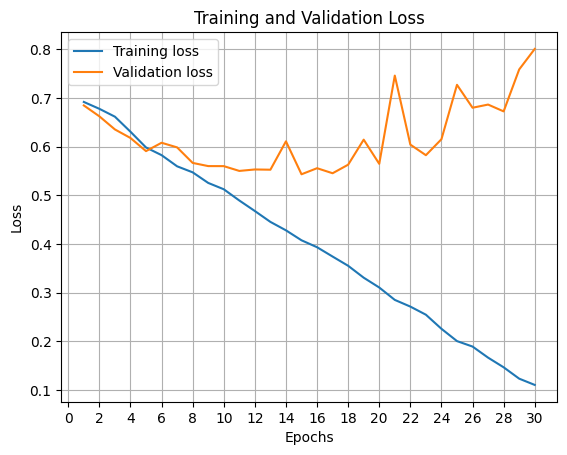

In [15]:
import matplotlib.pyplot as plt


epochs = range(1, 31)


plt.plot(epochs, history_dict['loss'], label= 'Training loss')
plt.plot(epochs, history_dict['val_loss'], label = 'Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.xticks(np.arange(0, 31, 2))
plt.legend(loc='best')
plt.show()

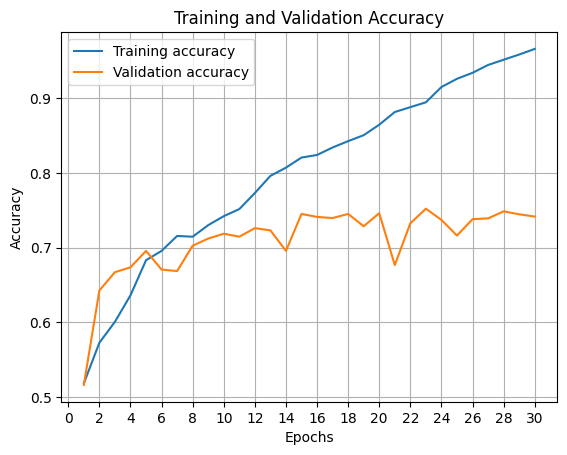

In [16]:
epochs = range(1, 31)


plt.plot(epochs, history_dict['accuracy'], label= 'Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label = 'Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.xticks(np.arange(0, 31, 2))
plt.legend(loc='best')
plt.show()

In [17]:
class myCallback(tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>0.9):
            print("\nReached 90/100 accuracy")
            self.model.stop_training = True

In [21]:
model_2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
callbacks = myCallback()

history_2 = model_2.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=[callbacks])

Epoch 1/30
100/100 [==============================] - 56s 553ms/step - loss: 0.6915 - accuracy: 0.5255 - val_loss: 0.7081 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 63s 627ms/step - loss: 0.6794 - accuracy: 0.5595 - val_loss: 0.6906 - val_accuracy: 0.5100
Epoch 3/30
100/100 [==============================] - 66s 663ms/step - loss: 0.6579 - accuracy: 0.6130 - val_loss: 0.6429 - val_accuracy: 0.6415
Epoch 4/30
100/100 [==============================] - 68s 683ms/step - loss: 0.6354 - accuracy: 0.6280 - val_loss: 0.6306 - val_accuracy: 0.6375
Epoch 5/30
100/100 [==============================] - 70s 697ms/step - loss: 0.6032 - accuracy: 0.6690 - val_loss: 0.6123 - val_accuracy: 0.6520
Epoch 6/30
100/100 [==============================] - 70s 701ms/step - loss: 0.5748 - accuracy: 0.7045 - val_loss: 0.6061 - val_accuracy: 0.6600
Epoch 7/30
100/100 [==============================] - 72s 715ms/step - loss: 0.5477 - accuracy: 0.7165 - val_loss: 0.5664 - val_ac

In [23]:
history_dict_2 = history_2.history
history_dict_2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

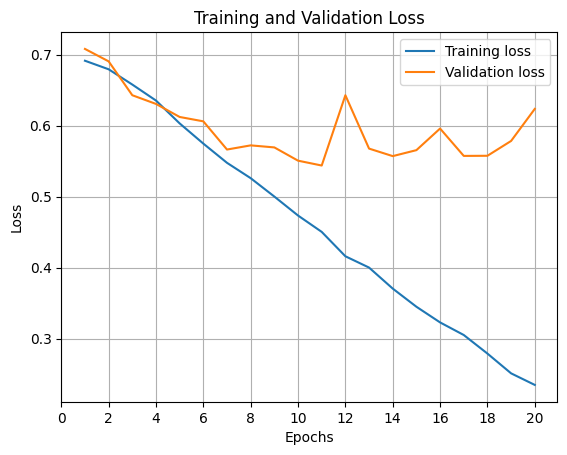

In [25]:
epochs = range(1, 21)


plt.plot(epochs, history_dict_2['loss'], label= 'Training loss')
plt.plot(epochs, history_dict_2['val_loss'], label = 'Validation loss')


plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.xticks(np.arange(0, 21, 2))
plt.legend(loc='best')
plt.show()

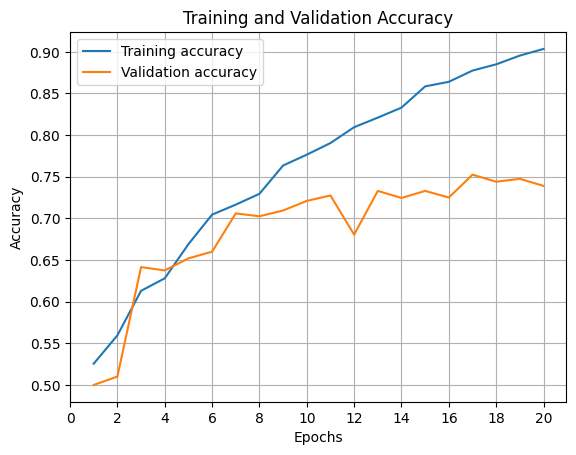

In [26]:
epochs = range(1, 21)


plt.plot(epochs, history_dict_2['accuracy'], label= 'Training accuracy')
plt.plot(epochs, history_dict_2['val_accuracy'], label = 'Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.xticks(np.arange(0, 21, 2))
plt.legend(loc='best')
plt.show()